<a href="https://colab.research.google.com/github/godots/DataAnalysis_OpenCollege/blob/master/Regex%26Konlpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic Modeling Flow

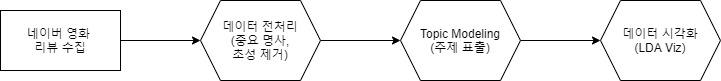

# 자연어 전처리 - 정규 표현식

## 1. Regex(Regular Expression) 이란?

정규표현식이란 문자열을 처리하는 방법 중의 하나로 특정한 조건의 문자를 '검색'하거나 '치환'하는 과정을 매우 간편하게 처리 할 수 있도록 하는 수단이다.

- 그래서 특정한 조건이 뭔데?
   - 이메일 주소 (asdf1234@naver.com)
   - 주민등록번호 (123456-7890123)
   - **텍스트 처리를 할 때 영어/한글만 남겨놓기**


### 1.1 Regex 사용 이유

In [ ]:
# 데이터 불러 오기
# Google Drive Mount
# Linux 명령어 Unzip을 사용하여 압축 해제

!unzip '/content/drive/MyDrive/환경 빅데이터 플랫폼 3차 교육/data/EnvBERT_데이터셋.zip'

Archive:  /content/drive/MyDrive/환경 빅데이터 플랫폼 3차 교육/data/EnvBERT_데이터셋.zip
replace label_info.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# 구글 드라이브 마운트

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import packages

import pandas as pd

train = pd.read_excel('train_set.xlsx')
train.head()


,id,label,text
0,3357,16,[울진 농업용 미생물 75t 연중 무료 공급]많이 본 기사
1,7485,0,[[오늘 날씨] '경칩' 영하권 꽃샘추위… 일부 지역서 눈발]체감온도가 -12도까지...
2,7434,2,"""[""""봄철 미세먼지·꽃가루로 지친 피부는 산소발생기 '오투덤 산소테라피'로""""]산..."
3,7516,0,['파란하늘 반가워']성동훈 기자 전국 대부분 미세먼지 농도가 좋음 을 나타내...
4,7517,0,[[오늘의 날씨] 전국 구름 많고 포근…미세먼지는 '나쁨']사진 연합뉴스 오늘은...


In [ ]:
# [text] Column만 이용
# 중복 값 제거 및 NA 값 제거

Data = train[['text']]
data = Data.drop_duplicates().dropna()

len(data)

4421

In [ ]:
data

,text
0,[울진 농업용 미생물 75t 연중 무료 공급]많이 본 기사
1,[[오늘 날씨] '경칩' 영하권 꽃샘추위… 일부 지역서 눈발]체감온도가 -12도까지...
2,"""[""""봄철 미세먼지·꽃가루로 지친 피부는 산소발생기 '오투덤 산소테라피'로""""]산..."
3,['파란하늘 반가워']성동훈 기자 전국 대부분 미세먼지 농도가 좋음 을 나타내...
4,[[오늘의 날씨] 전국 구름 많고 포근…미세먼지는 '나쁨']사진 연합뉴스 오늘은...
...,...
5066,"""[부여군, 친환경 굿뜨래농산물 생산 주력]농기센터 EM복합균 등 유용미생물 10..."
5067,"""[오산시,취약한 해빙기 맞아 4월 말까지 수질관리 특별점검]오산시는 수질오염사고에..."
5069,"""[美제재 불구…화웨이, 지난해 매출 148조원 '19.1% 급증']화웨이가 미국 ..."
5070,[[신년사] 차준택 인천부평구청장]존경하는 구민 여러분! 그리고 친애하는 직원 여...


## 2. Regex 문법

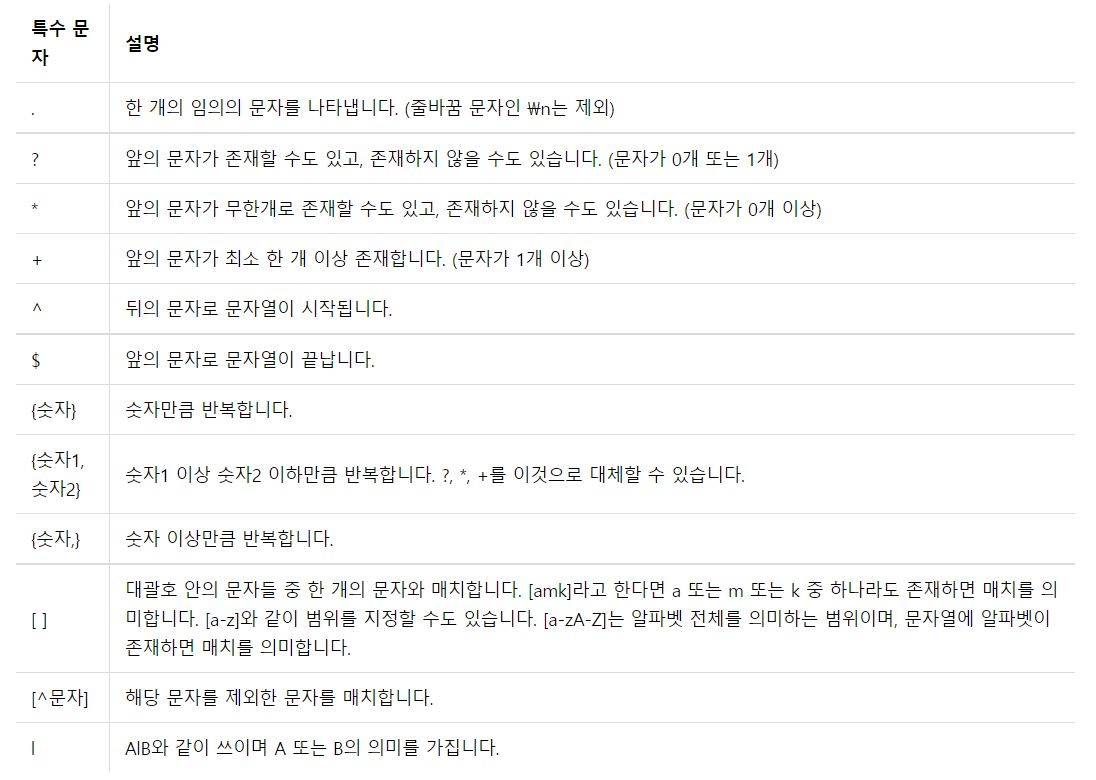

출처 : https://wikidocs.net/21703

### 2.1 .기호

.은 한 개의 임의의 문자

In [ ]:
# Python에서 정규표현식은 re

import re

In [ ]:
# re.compile --> 특정 패턴을 저장

r = re.compile('a.c') # a.c --> a와 c 사이의 어떤 1개의 문자

In [ ]:
r.search('kkk')

In [ ]:
r.search('azc')

<re.Match object; span=(0, 3), match='azc'>

### 2.2 ?기호

?는 ? 앞의 문자가 존재할 수도 있고, 존재하지 않을 수도 있는 경우

In [ ]:
import re

r = re.compile('ab?c') # ab?c --> b가 존재할 수도, 안 존재할 수도 있음

In [ ]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search('ac')

<re.Match object; span=(0, 2), match='ac'>

In [ ]:
r.search('abbc') # 문자가 하나가 아닌경우

### 2.3 *기호

*은 바로 앞의 문자가 0개 이상일 경우. 앞의 문자는 존재하지 않을 수도 있으며, 또는 여러 개일 수도 있음

In [ ]:
r = re.compile('ab*c') # ab*c --> b가 존재할 수도, 무수히 많을 수도 있음

In [ ]:
r.search('ac')

<re.Match object; span=(0, 2), match='ac'>

In [ ]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search('abbbbbbc')

<re.Match object; span=(0, 8), match='abbbbbbc'>

### 2.4 + 기호

+는 *와 유사하지만 앞의 문자는 무조건 1개 이상

In [ ]:
r = re.compile('ab+c') # ab+c --> b가 1개 이상 존재해야함

In [ ]:
r.search('ac')

In [ ]:
r.search('abc')

<re.Match object; span=(0, 3), match='abc'>

In [ ]:
r.search('abbbbc')

<re.Match object; span=(0, 6), match='abbbbc'>

### 2.5 ^기호

^는 시작되는 **글자**

In [ ]:
r = re.compile('^a') # ^a --> a로 시작하는 글자

In [ ]:
r.search('abc')

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search('bbc')

### 2.6 {숫자} 기호

앞의 문자를 숫자만큼 반복

In [ ]:
r = re.compile('ab{3}c') # ab{3}c --> b를 3번만큼 반복한 abbbc

In [ ]:
r.search('abbbc')

<re.Match object; span=(0, 5), match='abbbc'>

In [ ]:
r.search('abc')

### 2.7 {숫자1,숫자2} 기호

앞의 문자를 숫자 1 이상, 숫자 2 이하만큼 *반복*

In [ ]:
r = re.compile('ab{2,8}c') # ab{2,8}c --> b를 2번이상 8번 이하 반복하는 글자

In [ ]:
r.search('abbbc')

<re.Match object; span=(0, 5), match='abbbc'>

In [ ]:
r.search('abbbbbbbbc')

<re.Match object; span=(0, 10), match='abbbbbbbbc'>

In [ ]:
r.search('abbbbbbbbbbbbbbbbc')

In [ ]:
r.search('abc')

### 2.8 {숫자,} 기호

앞의 문자를 숫자 이상 만큼 반복

In [ ]:
r = re.compile('ab{3,}c') # ab{3,}c --> b를 3번 이상 반복하는 글자

In [ ]:
r.search('abbbc')

<re.Match object; span=(0, 5), match='abbbc'>

In [ ]:
r.search('abc')

### ☆ 2.9 [] 기호
문자들 중 한 개의 문자와 매치

In [ ]:
r = re.compile('[abc]') # [abc] --> a, b, c 중에 하나

In [ ]:
r.search('a')

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search('ab')

<re.Match object; span=(0, 1), match='a'>

In [ ]:
r.search('da')

<re.Match object; span=(1, 2), match='a'>

In [ ]:
r.search('ef')

In [ ]:
# 소문자

r = re.compile('[a-z]') # a부터 z까지 문자 하나

In [ ]:
r.search('dfa')

<re.Match object; span=(0, 1), match='d'>

In [ ]:
r.search('cat')

<re.Match object; span=(0, 1), match='c'>

In [ ]:
r.search('AAA') # 대문자는 인식 불가

In [ ]:
# 소문자 and 대문자

r = re.compile('[a-zA-Z]') # a부터 z까지, A부터 Z까지

In [ ]:
r.search('ABD')

<re.Match object; span=(0, 1), match='A'>

In [ ]:
r.search('aA')

<re.Match object; span=(0, 1), match='a'>

In [ ]:
# 한글

r = re.compile('[가-다]') # 가부터 다까지 모든 문자 EX) 가갸거겨고교구규....나냐노뉴...닣다

In [ ]:
r.search('가구')

<re.Match object; span=(0, 1), match='가'>

In [ ]:
r.search('늬우스')

<re.Match object; span=(0, 1), match='늬'>

In [ ]:
r.search('라면')

In [ ]:
# 한글 전체

r = re.compile('[ㄱ-힣]') # 모든 한글

In [ ]:
r.search('뷁')

<re.Match object; span=(0, 1), match='뷁'>

In [ ]:
r.search('홀몰')

<re.Match object; span=(0, 1), match='홀'>

### ☆ 2.10 [^문자] 기호

2.5번의 ^ 기호와 다른 뜻. 대괄호 안의 ^은 Not을 의미.

In [ ]:
r = re.compile('[^a]') # a를 제외한 다른 글자

In [ ]:
r.search('aaaa')

In [ ]:
r.search('d')

<re.Match object; span=(0, 1), match='d'>

In [ ]:
r.search('af')

<re.Match object; span=(1, 2), match='f'>

In [ ]:
r = re.compile('[^a-d]') # a부터 d까지를 제외한 다른 글자

In [ ]:
r.search('abc')

In [ ]:
r.search('efr')

<re.Match object; span=(0, 1), match='e'>

In [ ]:
r.search('cat')

<re.Match object; span=(2, 3), match='t'>

In [ ]:
# 한글 빼고 검색하려면?

r = re.compile('')

In [ ]:
r.search('')

<re.Match object; span=(0, 0), match=''>

## Regex 함수

re.compile과 re.search는 너무 많이 사용. 다른 함수는?

### 3.1 re.match

re.search() : 전체 문자열에 대해서 조건이 부합하는지

re.match() : 첫 문자열부터 정규 표현식 조건이 맞는지

In [ ]:
r = re.compile('[가-다]') # 가,나,다? --> 가,갸,거,겨.......닣, 다

In [ ]:
r.search('슈퍼가 망했다')

<re.Match object; span=(2, 3), match='가'>

In [ ]:
r.match('슈퍼가 망했다')

In [ ]:
r.match('다 망했다')

<re.Match object; span=(0, 1), match='다'>

### 3.2 re.split

정규표현식을 기준으로 문자열을 분리하여 리스트로 반환

In [ ]:
r = re.compile('[가-다]')

In [ ]:
r.split('슈퍼가 망함')

['슈퍼', ' 망함']

In [ ]:
r.split('가나다라가마바가')

['', '', '', '라', '마바', '']

### 3.3 re.findall
search와 match는 하나만 찾는 기능

findall은 조건에 부합하는 문자열 모두 리스트로 반환

In [ ]:
r = re.compile('[0-9]+') # 모든 숫자

In [ ]:
r.findall('내 전화번호 : 010-1234-5678 | 부재 시 이쪽으로 연락 주세요')

['010', '1234', '5678']

### ☆ 3.4 re.sub

문자열 패턴을 찾아 원하는 글자로 변환

In [ ]:
r = re.compile('[0-9]+') # 모든 숫자

In [ ]:
# 위에 내 전화번호 x로 바꾸고 싶어

r.sub("x", '내 전화번호 : 010-1234-5678 | 부재 시 이쪽으로 연락 주세요', )

'내 전화번호 : x-x-x | 부재 시 이쪽으로 연락 주세요'

In [ ]:
r = re.compile('[0-9]')

In [ ]:
r.sub("x", '내 전화번호 : 010-1234-5678 | 부재 시 이쪽으로 연락 주세요', )

'내 전화번호 : xxx-xxxx-xxxx | 부재 시 이쪽으로 연락 주세요'

※ **특수문자 제거하기**

Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern.

In [ ]:
# text라는 변수에 저장

text="Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern."

In [ ]:
text

'Regular expression : A regular expression, regex or regexp[1] (sometimes called a rational expression)[2][3] is, in theoretical computer science and formal language theory, a sequence of characters that define a search pattern.'

In [ ]:
r = re.compile('[^a-zA-Z]') # 영어가 아닌 것

In [ ]:
r.sub(" ", text)

'Regular expression   A regular expression  regex or regexp     sometimes called a rational expression        is  in theoretical computer science and formal language theory  a sequence of characters that define a search pattern '

※ **Compile 안쓰고도 활용 가능**

re.compile은 반복된 전처리를 수행할 때 편리

compile을 안써도 Regex는 사용 가능

또한 전처리 결과를 변수에 저장 가능

In [ ]:
re.sub('[0-9]','x','내 전화번호 : 010-1234-5678 | 부재 시 이쪽으로 연락 주세요' )

'내 전화번호 : xxx-xxxx-xxxx | 부재 시 이쪽으로 연락 주세요'

In [ ]:
re.split('[가-다]', '슈퍼가 망함')

['슈퍼', ' 망함']

In [ ]:
# 변수에 저장

result = re.split('[가-다]', '슈퍼가 망함')

In [ ]:
result

['슈퍼', ' 망함']

## 정규표현식을 연습할 수 있는 사이트

https://regex101.com/#python

# 자연어 전처리 - 한국어 처리

## Konlpy 란?

한국어를 위한 전처리 패키지.

한국어는 영어와 다르게 토크나이징이 쉽지 않음.

In [ ]:
# 영어는 띄어쓰기로 모든 단어가 구분되어 있기 때문에 자연어적으로 처리하기 매우 간편

text = "I'm on the next level"

result = re.split(' ',text)

In [ ]:
result

["I'm", 'on', 'the', 'next', 'level']

In [ ]:
# 한글은 매우 복잡한편

text = "사랑은 언제나 눈물이 되어 가슴에 남아"

result = re.split(' ', text)

In [ ]:
result # 조사, 존댓말 등의 다양한 변형 때문에 분석하기 어려운 편

['사랑은', '언제나', '눈물이', '되어', '가슴에', '남아']

- 사랑은 --> 사랑만 추출

- 되어 --> 되-

- 단어로 추출하게 도와주는 Konlpy

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 14.4MB/s 
     |████████████████████████████████| 92kB 8.4MB/s 
     |████████████████████████████████| 450kB 38.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


## Konlpy 종류

- mecab : 가장 성능이 우수하지만 mac 운영체제 전용
- okt : 성능이 준수하며 가장 범용적으로 사용됨
- khaii, komoran, kkma 등 다양한 형태소 분석기 존재

가능하면 여러개의 형태소 분석기를 써보고 분석마다 가장 좋은 성능을 보이는 분석기를 선택하는 것을 추천

## Konlpy 사용법

### ☆ 3.1 okt.nouns

문장에서 명사 추출

In [ ]:
# Okt 불러오기

from konlpy.tag import Okt, Komoran, Kkma

okt = Okt()
kom = Komoran()
kkm = Kkma()

In [ ]:
# okt.nouns() --> 명사 추출

text = "사랑은 언제나 눈물이 되어 가슴에 남아"

okt.nouns(text)

['사랑', '눈물', '가슴', '남아']

In [ ]:
# 분석기별 성능비교

text = "아버지가방에들어가신다"

# Okt

okt.nouns(text)

['아버지', '가방']

In [ ]:
# Komoran

kom.nouns(text)

['아버지', '가방']

In [ ]:
# Kkma

kkm.nouns(text)

['아버지', '아버지가방', '가방']

### 3.2 okt.morphs

명사 뿐만 아니라 모든 형태소 표출

In [ ]:
text1 = "사랑은 언제나 눈물이 되어 가슴에 남아"

text2 = "아버지가방에들어가신다"

In [ ]:
okt.morphs(text1)

['사랑', '은', '언제나', '눈물', '이', '되어', '가슴', '에', '남아']

In [ ]:
okt.morphs(text2)

['아버지', '가방', '에', '들어가신다']

### 3.3 okt.pos

각 형태소의 품사까지 추출

In [ ]:
okt.pos(text1)

[('사랑', 'Noun'),
 ('은', 'Josa'),
 ('언제나', 'Adverb'),
 ('눈물', 'Noun'),
 ('이', 'Josa'),
 ('되어', 'Verb'),
 ('가슴', 'Noun'),
 ('에', 'Josa'),
 ('남아', 'Noun')]

In [ ]:
okt.pos(text2)

[('아버지', 'Noun'), ('가방', 'Noun'), ('에', 'Josa'), ('들어가신다', 'Verb')]

In [ ]:
test = okt.pos(text1)

In [ ]:
import pandas as pd

In [ ]:
pd.DataFrame(test)

,0,1
0,사랑,Noun
1,은,Josa
2,언제나,Adverb
3,눈물,Noun
4,이,Josa
5,되어,Verb
6,가슴,Noun
7,에,Josa
8,남아,Noun
